# part 1


In [ ]:
# Import necessary libraries
import pandas as pd

# Load the dataset
file_path = 'new_customer_churn_dataset-testing-master.csv'  # Ensure the file is uploaded to your Colab environment
data = pd.read_csv(file_path)

# Display the first few rows of the dataset
print("First 5 rows of the dataset:")
print(data.head())

# Get information about the dataset (data types, non-null counts, etc.)
print("\nDataset Info:")
data.info()

# Checking for missing values
print("\nMissing values in each column:")
print(data.isnull().sum())

First 5 rows of the dataset:
   CustomerID  Age  Gender  Tenure  Usage Frequency  Support Calls  \
0           1   22  Female      25               14              4   
1           2   41  Female      28               28              7   
2           3   47    Male      27               10              2   
3           4   35    Male       9               12              5   
4           5   53  Female      58               24              9   

   Payment Delay Subscription Type Contract Length  Total Spend  \
0             27             Basic         Monthly          598   
1             13          Standard         Monthly          584   
2             29           Premium          Annual          757   
3             17           Premium       Quarterly          232   
4              2          Standard          Annual          533   

   Last Interaction  Churn  
0                 9      1  
1                20      0  
2                21      0  
3                18      0  
4 

In [ ]:
# Generate summary statistics for numerical columns
print("Numerical Summary:")
print(data.describe())

# Get counts of unique values in each categorical column
print("\nUnique Counts in Categorical Columns:")
print(data.select_dtypes(include='object').nunique())

# Display the counts of each unique value for categorical columns
print("\nValue Counts for Categorical Columns:")
for col in data.select_dtypes(include='object').columns:
    print(f"\n{col}:\n{data[col].value_counts()}")


Numerical Summary:
         CustomerID           Age        Tenure  Usage Frequency  \
count  64374.000000  64374.000000  64374.000000     64374.000000   
mean   32187.500000     41.970982     31.994827        15.080234   
std    18583.317451     13.924911     17.098234         8.816470   
min        1.000000     18.000000      1.000000         1.000000   
25%    16094.250000     30.000000     18.000000         7.000000   
50%    32187.500000     42.000000     33.000000        15.000000   
75%    48280.750000     54.000000     47.000000        23.000000   
max    64374.000000     65.000000     60.000000        30.000000   

       Support Calls  Payment Delay   Total Spend  Last Interaction  \
count   64374.000000   64374.000000  64374.000000      64374.000000   
mean        5.400690      17.133952    541.023379         15.498850   
std         3.114005       8.852211    260.874809          8.638436   
min         0.000000       0.000000    100.000000          1.000000   
25%         3

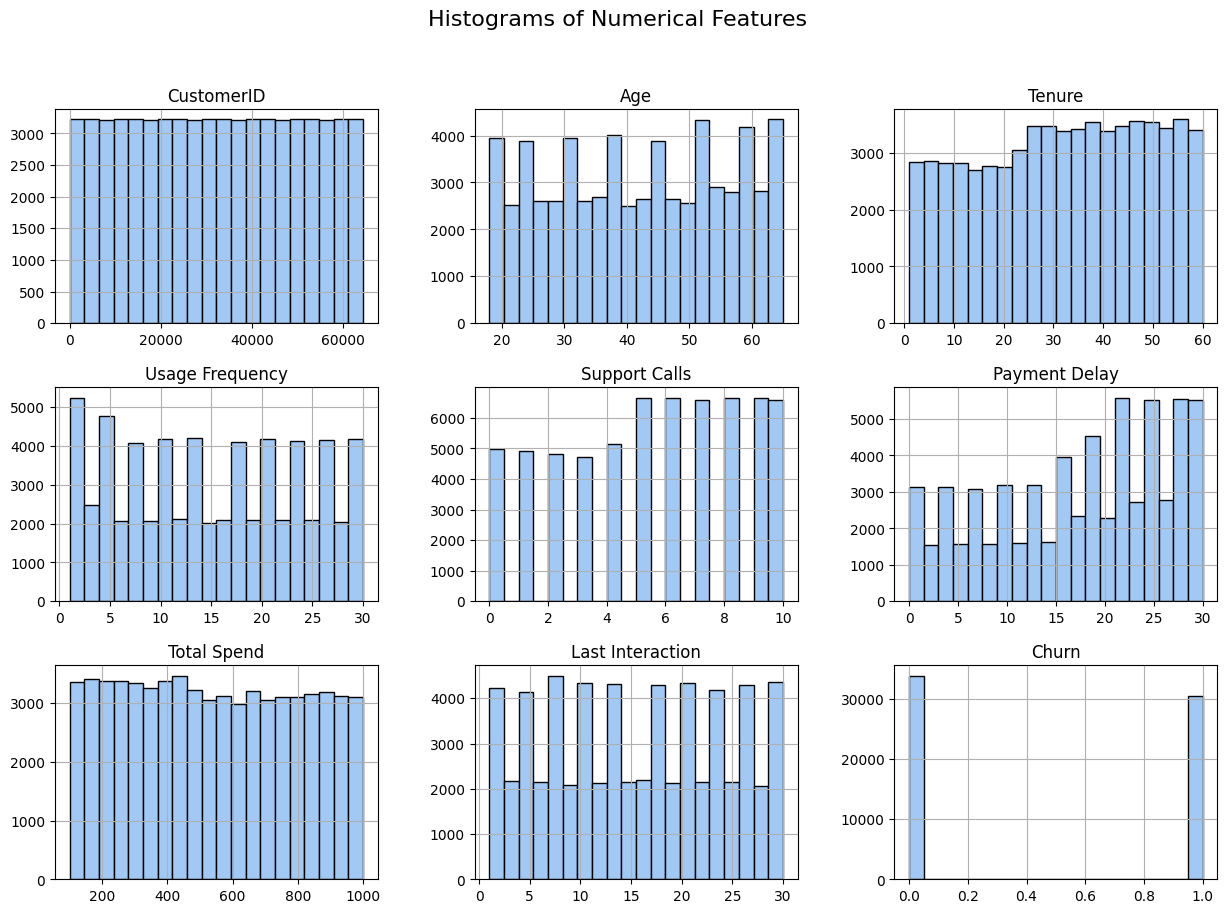

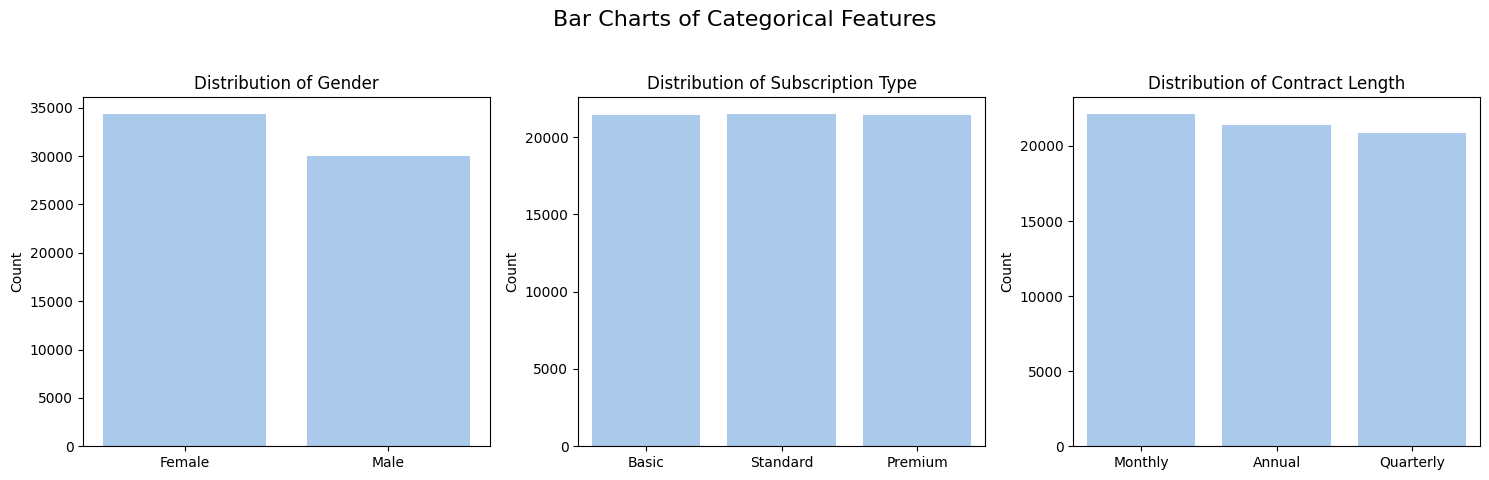

In [ ]:
# Import necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Set up visual styling
sns.set_palette("pastel")

# 1. Plotting histograms for numerical features
numerical_columns = data.select_dtypes(include='number').columns
data[numerical_columns].hist(figsize=(15, 10), bins=20, edgecolor='black')
plt.suptitle("Histograms of Numerical Features", fontsize=16)
plt.show()

# 2. Plotting bar charts for categorical features
categorical_columns = data.select_dtypes(include='object').columns
fig, axes = plt.subplots(1, len(categorical_columns), figsize=(15, 5))
fig.suptitle("Bar Charts of Categorical Features", fontsize=16)

for i, col in enumerate(categorical_columns):
    sns.countplot(data=data, x=col, ax=axes[i])
    axes[i].set_title(f"Distribution of {col}")
    axes[i].set_xlabel("")
    axes[i].set_ylabel("Count")

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


In [ ]:
# Import necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Set up visual styling
sns.set_palette("pastel")

# 1. Correlation heatmap for numerical features
# 1. Correlation heatmap for numerical features
plt.figure(figsize=(10, 8))

# Select only numerical columns for correlation
numerical_data = data.select_dtypes(include=['number'])
correlation_matrix = numerical_data.corr()

# Plot the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True, cbar_kws={'shrink': .8})
plt.title("Correlation Heatmap of Numerical Features")
plt.show()


# 2. Box plots of numerical features against 'Churn'
# Box plots of numerical features against 'Churn' with corrected grid layout and hue
numerical_columns = numerical_data.columns.drop('Churn', errors='ignore')  # Exclude 'Churn' if present

# Calculate the number of rows and columns for the subplots
num_plots = len(numerical_columns)
ncols = 3
nrows = (num_plots + ncols - 1) // ncols  # This formula calculates the necessary number of rows

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(18, nrows * 5))
fig.suptitle("Box Plots of Numerical Features by Churn", fontsize=16)

# Flatten axes array in case of a single row, making indexing easier
axes = axes.flatten() if nrows > 1 else [axes]

for i, col in enumerate(numerical_columns):
    sns.boxplot(data=data, x='Churn', y=col, ax=axes[i], hue='Churn', palette="pastel")
    axes[i].set_title(f"{col} by Churn")
    axes[i].set_xlabel("Churn")
    axes[i].set_ylabel(col)

# Hide any extra subplots if they exist
for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


# 3. Bar plots for categorical features against 'Churn'
fig, axes = plt.subplots(1, len(categorical_columns), figsize=(15, 5))
fig.suptitle("Churn Rate by Categorical Features", fontsize=16)

for i, col in enumerate(categorical_columns):
    sns.countplot(data=data, x=col, hue='Churn', ax=axes[i], palette="pastel")
    axes[i].set_title(f"{col} by Churn")
    axes[i].set_xlabel("")
    axes[i].set_ylabel("Count")

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


NameError: name 'data' is not defined

<Figure size 1000x800 with 0 Axes>

In [ ]:
# Summary of Key Insights from the Analysis
print("Key Findings and Insights:")

# 1. Relationships with Churn
print("\n1. Relationships with Churn:")
print("- Age and tenure may impact churn, as older and longer-tenured customers seem less likely to churn.")
print("- Higher payment delays and increased support calls show potential associations with higher churn.")

# 2. Subscription and Contract Insights
print("\n2. Subscription and Contract Insights:")
print("- Premium subscriptions have a lower churn rate than Standard and Basic, possibly due to better customer satisfaction.")
print("- Annual contracts correlate with lower churn, as customers in long-term plans may feel committed.")

# 3. Usage and Interaction Patterns
print("\n3. Usage and Interaction Patterns:")
print("- Customers with more recent interactions show lower churn, suggesting engagement reduces churn.")
print("- Moderate to high usage frequency may also be associated with better customer retention.")

print("\nThese insights can help tailor strategies for retention, such as targeting high-risk churn groups.")


Key Findings and Insights:

1. Relationships with Churn:
- Age and tenure may impact churn, as older and longer-tenured customers seem less likely to churn.
- Higher payment delays and increased support calls show potential associations with higher churn.

2. Subscription and Contract Insights:
- Premium subscriptions have a lower churn rate than Standard and Basic, possibly due to better customer satisfaction.
- Annual contracts correlate with lower churn, as customers in long-term plans may feel committed.

3. Usage and Interaction Patterns:
- Customers with more recent interactions show lower churn, suggesting engagement reduces churn.
- Moderate to high usage frequency may also be associated with better customer retention.

These insights can help tailor strategies for retention, such as targeting high-risk churn groups.
